Deep Learning
=============

Assignment 2
------------

Previously in `1_notmnist.ipynb`, we created a pickle with formatted datasets for training, development and testing on the [notMNIST dataset](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html).

The goal of this assignment is to progressively train deeper and more accurate models using Keras.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import cPickle as pickle
import numpy as np

# The main module within keras is the "Sequential" model (but not the only module!)
# This is the one we'll be concerned with most often.  The Dense and Activation are part of the network
# layers.
from keras.models import Sequential
from keras.layers import Dense, Activation

Using Theano backend.


First reload the data we generated in `1_notmist.ipynb`.

In [2]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print 'Training set', train_dataset.shape, train_labels.shape
  print 'Validation set', valid_dataset.shape, valid_labels.shape
  print 'Test set', test_dataset.shape, test_labels.shape

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (18724, 28, 28) (18724,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings (See https://en.wikipedia.org/wiki/One-hot).

In [3]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print 'Training set', train_dataset.shape, train_labels.shape
print 'Validation set', valid_dataset.shape, valid_labels.shape
print 'Test set', test_dataset.shape, test_labels.shape

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (18724, 784) (18724, 10)


We're first going to train a multinomial logistic regression using stochastic gradient descent.

Keras works like this:
* You build a model, like this simple model:

      model = Sequential([
        Dense(32, input_dim=784),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
        ])

* Then you define specifics of the model, such as optimize:


        model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Refer to the Keras page for more information.  A good place to start is here:  https://keras.io/getting-started/sequential-model-guide/

Let's build the model to mimic the linear regression you did the last exercise:

In [4]:
# Let's subset the data for faster turnaround.
train_subset = 5000

# Let's build our model . . . 
model = Sequential()

# The first argument is the type of layer to add; in this case "Dense" network, which is a typical 
# (weights * input + bias) configuration.  It's first input is the number of neurons to add.  In this case, we want
# to add our 28 x 28 size, so there is a neuron for each input.  The next is the input dimension. 
# The init argument defines how the weights will be initalized.  In this case "normal" means that they will be 
# initalized with a normal gaussian (N(0, 1)).  Finally, the activation function is the relu function.
model.add(Dense(train_dataset.shape[1], input_dim=train_dataset.shape[1], init='normal', activation='relu'))

# The next layer for the Linear Regression model we're building is the output layer, which has the 1-hot encodings
# for each of our classes (where, "A, B, C, D, E, F, G, H, I, J" represents the ten classes).  Same arguments for this
# layer, expect for the activition, which should be "softmax", which provides the sigmodial like function to make
# the 1-hot encoding label at the end of the network.
model.add(Dense(train_labels.shape[1], init='normal', activation='softmax'))

Let's define the optimizer (the stochastic gradient descent [SGD]) and the loss, compile, and then run.  We'll use "categorical crossentropy" for the loss, which will calculate the loss using crossentropy and our 1-hot encoded categories.

In [5]:
from keras.optimizers import SGD
import time
sgd = SGD(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

We'll keep it short, only running 32 epochs with a batch size of 32 for each iteration.  The epoch must be divisible by the batch size.

In [6]:
model.fit(train_dataset[:train_subset, :], train_labels[:train_subset], nb_epoch=32, batch_size=32, verbose=1)

Epoch 1/32
5000/5000 [==============================] - 0s - loss: 1.0111 - acc: 0.7334     
Epoch 2/32
5000/5000 [==============================] - 0s - loss: 0.6191 - acc: 0.8200     
Epoch 3/32
5000/5000 [==============================] - 0s - loss: 0.4825 - acc: 0.8638     
Epoch 4/32
5000/5000 [==============================] - 0s - loss: 0.3865 - acc: 0.8850     
Epoch 5/32
5000/5000 [==============================] - 0s - loss: 0.3140 - acc: 0.9184     
Epoch 6/32
5000/5000 [==============================] - 0s - loss: 0.2547 - acc: 0.9288     
Epoch 7/32
5000/5000 [==============================] - 0s - loss: 0.3990 - acc: 0.9134     
Epoch 8/32
5000/5000 [==============================] - 0s - loss: 0.2483 - acc: 0.9396     
Epoch 9/32
5000/5000 [==============================] - 0s - loss: 0.1732 - acc: 0.9586     
Epoch 10/32
5000/5000 [==============================] - 0s - loss: 0.1297 - acc: 0.9722     
Epoch 11/32
5000/5000 [==============================] - 0s - loss: 0

In [7]:
score = model.evaluate(test_dataset, test_labels, batch_size=20)

18540/18724 [============================>.] - ETA: 0s

The metric names (below) are the metrics that are automatically calculated by the model.

In [8]:
model.metrics_names

['loss', 'acc']

"loss" is the score that is produced by the optimizer and "acc" is the accuracy of that score (that is, how many times did the algorithm get it right with the training data provided).  When we calculated score from "score = model.evaluate..." we are scoring the model against unseen data (that is, data not used for training).

In [9]:
score

[0.70455819109475015, 0.9012497285318487]

Note that the score from the training is (likely) higher than the score from the test data.  This is because test-on-train always overestimates.  Our mulinomial regression model is performing pretty well, at about 89% accuracy.  That's not bad.  Let's try to improve it, while learning some new things.

---

Let's turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units (nn.relu()) and 1024 hidden nodes. This model should improve your validation / test accuracy.

---

In [10]:
# Let's build our model . . . 
model = Sequential()

# Input layer
model.add(Dense(train_dataset.shape[1], input_dim=train_dataset.shape[1], init='normal', activation='relu'))

# Hidden layer
model.add(Dense(1024, init='normal', activation='relu'))

# Output layer
model.add(Dense(train_labels.shape[1], init='normal', activation='softmax'))

In [11]:
sgd = SGD(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Let's learn how to record and plot the losses after fitting.  This is accomplished through "callbacks".  Here, we'll define a class that will have two methods in it:  on_train_begin and on_epoch_end.  When the fit routine begins, it will make a callback to the on_train_begin method in the LossHistory class.  This initializes the variable "losses".  Then, at the end of each epoch, the method on_epoch_end is called, which then appends the loss value for the epoch to the "losses" list.  From there, we should be able to plot.

In [12]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [13]:
# Let's create an object LossHistory()
history = LossHistory()

# Note the argument at the end of the fit method "callbacks = [history]"
model.fit(train_dataset[:train_subset, :], train_labels[:train_subset], nb_epoch=32, batch_size=32, verbose=1, callbacks=[history])

Epoch 1/32
5000/5000 [==============================] - 1s - loss: 0.9882 - acc: 0.7364     
Epoch 2/32
5000/5000 [==============================] - 1s - loss: 0.5331 - acc: 0.8332     
Epoch 3/32
5000/5000 [==============================] - 1s - loss: 0.3791 - acc: 0.8804     
Epoch 4/32
5000/5000 [==============================] - 1s - loss: 0.3107 - acc: 0.9056     
Epoch 5/32
5000/5000 [==============================] - 1s - loss: 0.2558 - acc: 0.9212     
Epoch 6/32
5000/5000 [==============================] - 1s - loss: 0.1772 - acc: 0.9466     
Epoch 7/32
5000/5000 [==============================] - 1s - loss: 0.1538 - acc: 0.9552     
Epoch 8/32
5000/5000 [==============================] - 1s - loss: 0.1313 - acc: 0.9628     
Epoch 9/32
5000/5000 [==============================] - 1s - loss: 0.1353 - acc: 0.9620     
Epoch 10/32
5000/5000 [==============================] - 1s - loss: 0.0981 - acc: 0.9714     
Epoch 11/32
5000/5000 [==============================] - 1s - loss: 0

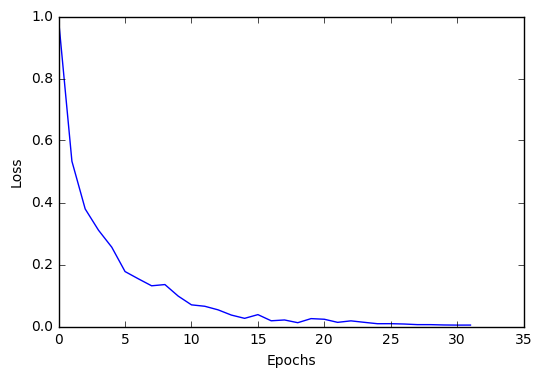

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(32), history.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [15]:
score = model.evaluate(test_dataset, test_labels, batch_size=20)

18720/18724 [============================>.] - ETA: 0s

In [16]:
print('Accuracy score is %f' % (score[1]*100))

Accuracy score is 90.760521
